In [11]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime
from string import punctuation

#words counter
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.tokenize import word_tokenize 


In [2]:
# load data
df = pd.read_csv('test_data/2020-04-11tweets-covid-19.csv')
df.head()

,screen_name,created_at,location,source,hashtags,text
0,CulverleyGreen,2020-04-11 12:22:18,Catford,Twitter for iPhone,NaN,Respect your neighbours and the environment by...
1,wellsgerge,2020-04-11 12:22:18,Coast,Twitter for Android,NaN,@_Maloba_ Covid-19 is real..R.I.P
2,HicSqueekGiggle,2020-04-11 12:22:18,"Burleson, Tx",Twitter for Android,NaN,.@CNN used a pic of people during Hurricane Ha...
3,elsitlab,2020-04-11 12:22:18,"Paris, France",Twitter for Android,NaN,COVID-19 tracing is the most significant techn...
4,RightLax1,2020-04-11 12:22:18,"St Louis, MO",Twitter for Android,NaN,BREAKING: Democrat Kentucky Governor Andy Besh...


# Data preprocess

In [3]:
# Transform string data and remove punctuation
df['text_clean'] = df['text'].apply(lambda x: str(x).lower())
df['text_clean'] = df['text'].apply(lambda x: ''.join([c for c in x if c not in punctuation]))

In [4]:
# Get length of review for Exploratory data analysis (EDA)
df['text_length'] = df['text'].apply(lambda x: len(x))

In [5]:
# Check the data again
df.head()

,screen_name,created_at,location,source,hashtags,text,text_clean,text_length
0,CulverleyGreen,2020-04-11 12:22:18,Catford,Twitter for iPhone,NaN,Respect your neighbours and the environment by...,Respect your neighbours and the environment by...,299
1,wellsgerge,2020-04-11 12:22:18,Coast,Twitter for Android,NaN,@_Maloba_ Covid-19 is real..R.I.P,Maloba Covid19 is realRIP,33
2,HicSqueekGiggle,2020-04-11 12:22:18,"Burleson, Tx",Twitter for Android,NaN,.@CNN used a pic of people during Hurricane Ha...,CNN used a pic of people during Hurricane Harv...,171
3,elsitlab,2020-04-11 12:22:18,"Paris, France",Twitter for Android,NaN,COVID-19 tracing is the most significant techn...,COVID19 tracing is the most significant techno...,274
4,RightLax1,2020-04-11 12:22:18,"St Louis, MO",Twitter for Android,NaN,BREAKING: Democrat Kentucky Governor Andy Besh...,BREAKING Democrat Kentucky Governor Andy Beshe...,238


Text(0.5, 1.0, 'Distribution of review length')

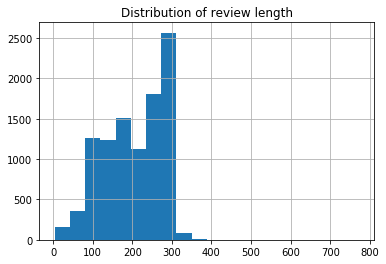

In [6]:
# And take a look at the distribution of the length
df['text_length'].hist(bins=20)
plt.title('Distribution of review length')

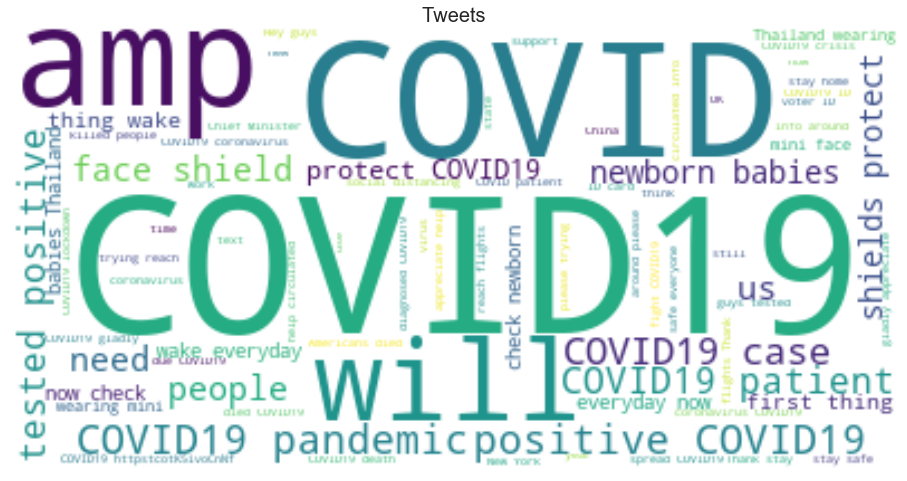

In [13]:
#words cloud of most comman words 

np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Tweets',size=20)
plt.show()

# Sentiment